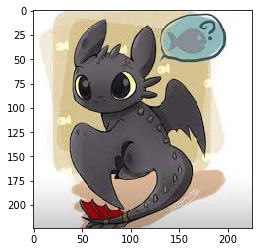

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

image = Image.open('./data/toothless.jpg')
plt.imshow(image)

## Image masking usint `PIL.Image.composite()`

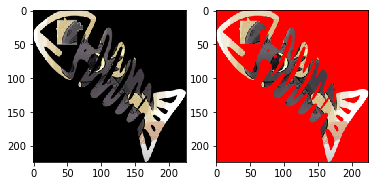

In [67]:
from PIL import Image

background = Image.open('./data/toothless.jpg')
foreground = Image.open('./data/fish-bone.jpg')
foreground = foreground.resize((background.size), Image.ANTIALIAS)
mask = Image.open('./data/fish-bone.png')
mask = mask.resize((background.size), Image.ANTIALIAS)

result = Image.composite(background, foreground, mask)
plt.subplot(1,2,1)
plt.imshow(result)

###################

background = Image.open('./data/toothless.jpg')
foreground = Image.new('RGB', background.size, (255, 0, 0)) # foreground colour as red
mask = Image.open('./data/fish-bone.png')
mask = mask.resize((background.size), Image.ANTIALIAS)

result = Image.composite(background, foreground, mask)
plt.subplot(1,2,2)
plt.imshow(result)

### Convert jpg to mask

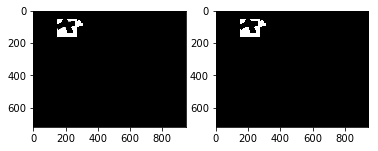

In [70]:
from PIL import Image 
img = Image.open('./data/fish-bone.jpg') # open colour image
plt.subplot(1,2,1)
plt.imshow(img)

img = img.convert('1') # convert image to black and white
plt.subplot(1,2,2)
plt.imshow(img)

#image_file.save('your-new-image.jpg')

### JPG image as a mask

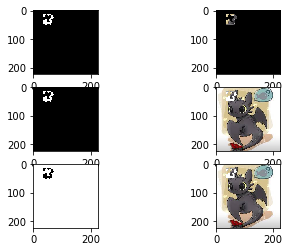

In [219]:
from PIL import Image, ImageOps

background = Image.open('./data/toothless.jpg')
foreground = Image.open('./data/fish-bone.jpg')
foreground = foreground.resize((background.size), Image.ANTIALIAS) # background and foreground needs to be the same size

mask = foreground
mask = mask.convert('1') # Convert jpg to mask
mask = mask.resize((background.size), Image.ANTIALIAS)

result = Image.composite(background, foreground, mask)
plt.subplot(3,2,1)
plt.imshow(mask, cmap='binary')
plt.subplot(3,2,2)
plt.imshow(result)

######

background = Image.open('./data/toothless.jpg')
foreground = Image.open('./data/fish-bone.jpg')
foreground = foreground.resize((background.size), Image.ANTIALIAS) # background and foreground needs to be the same size

mask = foreground
mask = mask.convert('1') # Convert jpg to binary (black and white)
mask = mask.convert('L') # Convert jpg to monochrome (greyscale)
mask = ImageOps.invert(mask) 
mask = mask.resize((background.size), Image.ANTIALIAS)

result = Image.composite(background, foreground, mask)
plt.subplot(3,2,3)
plt.imshow(mask, cmap='binary')
plt.subplot(3,2,4)
plt.imshow(result)

######
background = Image.open('./data/toothless.jpg')
foreground = Image.open('./data/fish-bone.jpg')
foreground = foreground.resize((background.size), Image.ANTIALIAS) # background and foreground needs to be the same size

mask = foreground
mask = mask.resize((background.size), Image.ANTIALIAS)
mask_array = np.asarray(mask)
mask_array = np.invert(mask_array)
mask_inverted = Image.fromarray(mask_array)
mask_inverted = mask_inverted.convert('1') # Convert jpg to binary (black and white)

result = Image.composite(background, foreground, mask_inverted)
plt.subplot(3,2,5)
plt.imshow(mask_inverted, cmap='binary')
plt.subplot(3,2,6)
plt.imshow(result)

### Inverting a mask

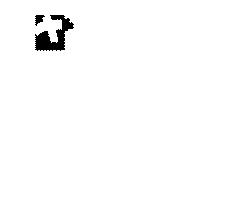

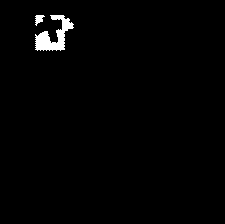

In [102]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
mask
mask_array = np.asarray(mask)
mask_array = np.invert(mask_array)
mask_inverted = Image.fromarray(mask_array)
mask_inverted

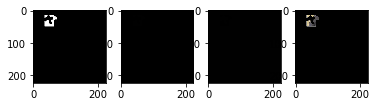

In [170]:
######
background = Image.open('./data/toothless.jpg')
foreground = Image.open('./data/fish-bone.jpg')
foreground = foreground.resize((background.size), Image.ANTIALIAS) # background and foreground needs to be the same size

mask = np.asarray(foreground)
mask_binary = mask.copy()
mask_binary[mask>=150] = 1
mask_binary[mask<150] = 0

mask_invert = 1-mask_binary

new1 = mask * mask_invert

new2 = np.asarray(background) * mask_binary

result = new1 + new2

plt.subplot(1,4,1)
plt.imshow(foreground)
plt.subplot(1,4,2)
plt.imshow(Image.fromarray(mask_binary))
plt.subplot(1,4,3)
plt.imshow(Image.fromarray(mask_invert))
plt.subplot(1,4,4)
plt.imshow(Image.fromarray(result))

In [169]:
a = np.asarray([100, 100, 255, 255])
b = np.asarray([10, 10, 50, 50])
'a: {}'.format(a)
'b: {}'.format(b)

a_binary = a.copy()
a_binary[a>=255] = 1
a_binary[a<150] = 0

'a_binary : {}'.format(a_binary)

a_invert = 1-a_binary
'a_invert : {}'.format(a_invert)

new1 = a * a_invert
'new1: {}'.format(new1)

new2 = b * a_binary
'new2: {}'.format(new2)

new = new1 + new2
'new: {}'.format(new)

'a: [100 100 255 255]'

'b: [10 10 50 50]'

'a_binary : [0 0 1 1]'

'a_invert : [1 1 0 0]'

'new1: [100 100   0   0]'

'new2: [ 0  0 50 50]'

'new: [100 100  50  50]'

In [199]:
a = np.asarray([100, 100, 255, 255])
b = np.asarray([10, 10, 50, 50])
'a: {}'.format(a)
'b: {}'.format(b)

a_binary = a.copy()
a_binary = a>=255
a_binary = a<150

'a_binary : {}'.format(a_binary)

a_invert = np.invert(a_binary)
'a_invert : {}'.format(a_invert)

new1 = a * a_invert
'new1: {}'.format(new1)

new2 = b * a_binary
'new2: {}'.format(new2)

new = new1 + new2
'new: {}'.format(new)

'a: [100 100 255 255]'

'b: [10 10 50 50]'

'a_binary : [ True  True False False]'

'a_invert : [False False  True  True]'

'new1: [  0   0 255 255]'

'new2: [10 10  0  0]'

'new: [ 10  10 255 255]'

## Bitwise Operation using OpenCV

In [184]:
img1.shape[0:2]

(224, 225)

## Image Resize

In [4]:
import glob

datapath = './data/'
#f_list = [os.path.join(root,f) for root, directories, filenames in os.walk(datapath) for f in filenames]
#'len(f_list): {0}'.format(len(f_list))
f_list = glob.glob(datapath + '*.jpg')

for f in f_list:
    print(f)
    img = Image.open(f)
    img = img.resize((100,100), Image.ANTIALIAS) 
    #img.save(f)

./data/toothless.jpg


## Draw a polygon using `PIL.ImageDraw.Draw()`

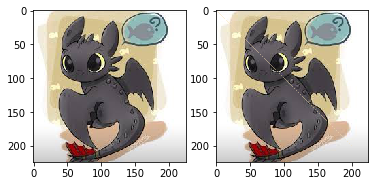

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
from PIL import ImageDraw

%matplotlib inline

img = Image.open('./data/toothless.jpg')

plt.subplot(1,2,1)
plt.imshow(image)

img2 = img.copy()
img2.size
type(img2)

draw = ImageDraw.Draw(img2)
draw.polygon(((0,0),(200,200)), fill = "wheat")

img3 = Image.blend(img, img2, 0.5)

plt.subplot(1,2,2)
plt.imshow(img3)

## Tiff to jpg + manipulate pixels

In [ ]:
import rasterio
import numpy as np
from PIL import Image
from PIL import ImageDraw

# Reading in data
tiff = rasterio.open(path_tiff+'nDSM_Resample1.tif', 'r')

if tiff.count == 1:
    grey = tiff.read(1)
    pix = grey
    # for the purpose of ploting an image, replace nan with zeros
    pix = np.nan_to_num(pix)
    # Normalised [0,255] as integer
    pix = (255*(pix - np.max(pix))/-np.ptp(pix)).astype(int)
    # Stack to make 3 channels
    pix = np.dstack((pix, pix, pix))
img = Image.fromarray(pix.astype('uint8'), 'RGB')
#plt.imshow(img)
#img.save(path_tiff + 'nDSM_Resample1_grayscale.jpg')

## Superimpose using `PIL.Image.paste()`

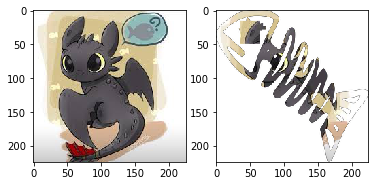

In [39]:
from PIL import Image

foreground = Image.open('./data/toothless.jpg')
background = Image.open('./data/fish-bone.png')

# needs to be same size
# background needs to be a mask
background = background.resize((foreground.size), Image.ANTIALIAS)

foreground.paste(foreground, (0, 0), background)
plt.subplot(1,2,1)
plt.imshow(foreground)

plt.subplot(1,2,2)
background.paste(foreground, (0, 0), background)
plt.imshow(background)

## Blending images using `PIL.Image.blend()`

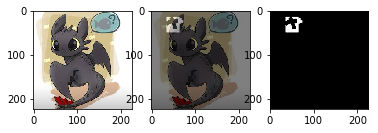

In [27]:
from PIL import Image

img = Image.open('./data/toothless.jpg')
img2 = Image.open("./data/fish-bone.jpg")
img2 = img2.resize((img.size), Image.ANTIALIAS)

# img needs to be the same size as img2

plt.subplot(1,3,1)
blended = Image.blend(img, img2, alpha=0.0)
plt.imshow(blended)

plt.subplot(1,3,2)
blended = Image.blend(img, img2, alpha=0.5)
plt.imshow(blended)

plt.subplot(1,3,3)
blended = Image.blend(img, img2, alpha=1.0)
plt.imshow(blended)


#blended.save("blended.png")

## Convert png to jpg

In [19]:
from PIL import Image

img = Image.open('./data/fish-bone.png')
rgb_img = img.convert('RGB')
#rgb_img.save('./data/fish-bone.jpg')

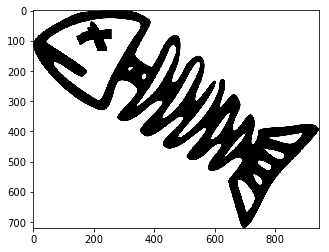

In [24]:
from PIL import Image

img = Image.open('./data/fish-bone.png')
bg = Image.new("RGB", img.size, (255,255,255))
bg.paste(img,img)
plt.imshow(bg)
#rgb_img.save('./data/fish-bone2.jpg')

## Add Borders

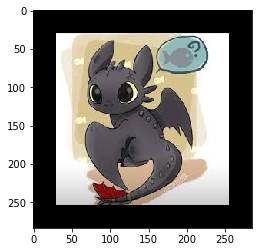

In [18]:
from PIL import Image, ImageOps
img = Image.open('./data/toothless.jpg')
img_with_border = ImageOps.expand(img,border=30,fill='black')
#img_with_border.save('new-file-name.jpg')

plt.imshow(img_with_border)

## Superimpose 
- naive
- Gaussian Smoothing + Otsu Thresholding

In [221]:
def naive_mask(mask):
    ''' 
    Take an image of relatively homogenous background and turn into a mask.
    return a boolean mask and a boolean inversed mask
    '''
    import numpy as np
    
    r = mask[:,:,0]
    g = mask[:,:,1]
    b = mask[:,:,2]

    mask_bool = np.empty(mask.shape, dtype=bool)
    mask_bool_inv = np.empty(mask.shape, dtype=bool)

    mask_bool[:,:,0] = r==255 # True
    mask_bool[:,:,1] = g==255 # True
    mask_bool[:,:,2] = b==255 # True

    mask_bool_inv = np.invert(mask_bool)
            
    return mask_bool, mask_bool_inv

def otsu_mask(mask):
    ''' 
    Take an image of relatively homogenous background and turn into a mask using Otsu's Thresholding.
    return a boolean mask and a boolean inversed mask
    '''
    import numpy as np
    import cv2

    gray = cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(gray,(5,5),0)
    ret,thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # a height x width, 2D

    # positive mask
    mask_bool = thresh == 255 
    mask_bool = np.dstack((mask_bool, mask_bool, mask_bool))

    # negative mask
    mask_bool_inv = np.invert(mask_bool)    
    
    return mask_bool, mask_bool_inv

def superimpose_images(foreground_path, background_path, mode):
    import numpy as np
    import cv2

    foreground = cv2.imread(foreground_path); 
    background = cv2.imread(background_path); 
    background = cv2.resize(background, (foreground.shape[1], foreground.shape[0])); 
        
    # use foreground as mask, in this case catalogue
    mask = foreground

    if mode == 'naive':
        mask_bool, mask_bool_inv = naive_mask(mask); 
    elif mode == 'otsu':
        mask_bool, mask_bool_inv = otsu_mask(mask); 
    
    # get the foreground, in this case is the object of interest in catalogue
    fg = foreground * mask_bool_inv
    # get the background, in this case is a background image
    bg = background * mask_bool
    # add 
    superimposed = fg + bg
    
    return superimposed

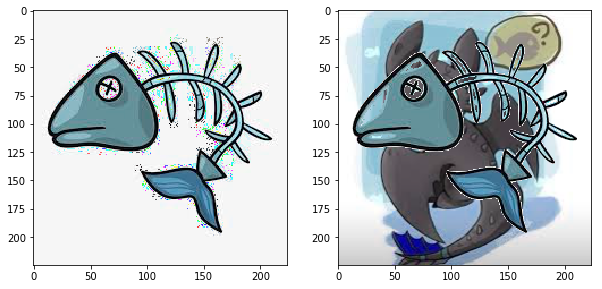

In [222]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
import matplotlib.pyplot as plt
%matplotlib inline

foreground_path = './data/fish.jpg'
background_path = './data/toothless.jpg'

plt.figure(figsize=(10,10))


superimposed = superimpose_images(foreground_path, background_path, mode='naive')
plt.subplot(1,2,1)
plt.imshow(superimposed)

superimposed = superimpose_images(foreground_path, background_path, mode='otsu')
plt.subplot(1,2,2)
plt.imshow(superimposed)

(225, 224)


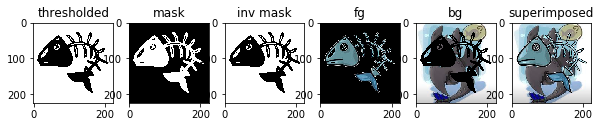

In [224]:
InteractiveShell.ast_node_interactivity = "last"

import numpy as np
import cv2

foreground_path = './data/fish.jpg'
background_path = './data/toothless.jpg'

background = cv2.imread(background_path);
foreground = cv2.imread(foreground_path); 

# resize background same size as foreground
background = cv2.resize(background, (foreground.shape[1], foreground.shape[0]))

# creating a mask with foreground image
# convert to grayscale
gray = cv2.cvtColor(foreground,cv2.COLOR_BGR2GRAY)

# Gaussian filtering
blur = cv2.GaussianBlur(gray,(5,5),0)

# Otsu Thresholding
ret,thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # a height x width, 2D

# positive mask
mask_bool = thresh == 255 ; print(mask_bool.shape)
mask_bool = np.dstack((mask_bool, mask_bool, mask_bool))

# negative mask
mask_bool_inv = np.invert(mask_bool)

plt.figure(figsize=(10,10))
# invert thresh for visualisation only
plt.subplot(1,6,1)
plt.imshow((np.invert(thresh)).astype('uint8')*255, cmap='binary')
plt.title('thresholded')

# invert mask_bool for visualisation only
plt.subplot(1,6,2)
plt.imshow((np.invert(mask_bool)).astype('uint8')*255, cmap='binary')
plt.title('mask')

# invert mask_bool_inv for visualisation only
plt.subplot(1,6,3)
plt.imshow((np.invert(mask_bool_inv)).astype('uint8')*255, cmap='binary')
plt.title('inv mask')

fg = foreground * mask_bool_inv
plt.subplot(1,6,4)
plt.imshow(fg)
plt.title('fg')

bg = background * mask_bool
plt.subplot(1,6,5)
plt.imshow(bg)
plt.title('bg')

superimposed = fg + bg
plt.subplot(1,6,6)
plt.imshow(superimposed)
plt.title('superimposed')

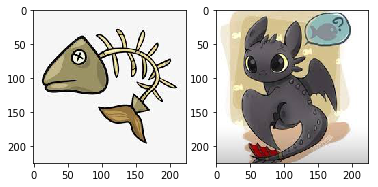

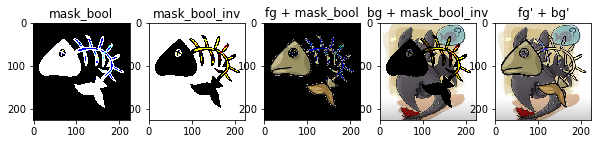

In [218]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

background = Image.open('./data/toothless.jpg')
foreground = Image.open('./data/fish.jpg')
background = background.resize((foreground.size), Image.ANTIALIAS) # background and foreground needs to be the same size

plt.subplot(1,2,1)
plt.imshow(foreground)
plt.subplot(1,2,2)
plt.imshow(background)

mask = np.asarray(foreground)
mask.shape

r = mask[:,:,0]
g = mask[:,:,1]
b = mask[:,:,2]

mask_bool = np.empty(mask.shape, dtype=bool)
mask_bool_inv = np.empty(mask.shape, dtype=bool)

mask_bool[:,:,0] = r>=210 # True ?? False
mask_bool[:,:,0] = r<210 # False ?? True
mask_bool[:,:,1] = g>=210 # True
mask_bool[:,:,1] = g<210 # False
mask_bool[:,:,2] = b>=210 # True
mask_bool[:,:,2] = b<210 # False

#mask_bool[:,:,0]

for i in range(0,3):
    mask_bool_inv[:,:,i] = np.invert(mask_bool[:,:,i])
#m_inv

plt.figure(figsize=(10,10))

plt.subplot(1,5,1)
plt.imshow((mask_bool).astype('uint8')*255, cmap='binary')
plt.title('mask_bool')

plt.subplot(1,5,2)
plt.imshow((mask_bool_inv).astype('uint8')*255, cmap='binary')
plt.title('mask_bool_inv')

fg = np.asarray(foreground) * mask_bool
#fg = np.asarray(foreground) * mask_bool_inv
plt.subplot(1,5,3)
plt.imshow(fg)
plt.title('fg + mask_bool')

bg = np.asarray(background) * mask_bool_inv
#bg = np.asarray(background) * mask_bool
plt.subplot(1,5,4)
plt.imshow(bg)
plt.title('bg + mask_bool_inv')

superimposed = fg + bg
plt.subplot(1,5,5)
plt.imshow(superimposed)
plt.title("fg' + bg'")

## Reference

http://effbot.org/imagingbook/image.htm